In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
data.drop(['id'], axis=1, inplace = True)

In [6]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
data['bmi'].fillna(value = data['bmi'].mean(),inplace = True)

In [9]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# AGE DISTRIBUTION

Amount of Patients in Each Age Group
Ages 0-10:  507
Ages 10-20:  518
Ages 20-30:  545
Ages 30-40:  674
Ages 40-50:  739
Ages 50-60:  823
Ages 60-70:  594
Ages 70-80:  594
Ages 80+:  116


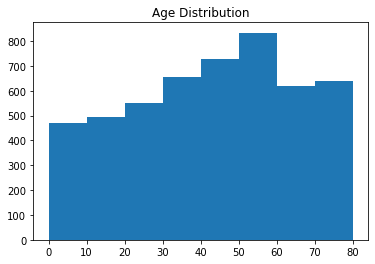

In [10]:
plt.hist(data["age"], bins = [0, 10, 20, 30, 40, 50, 60, 70, 80])
plt.title("Age Distribution")

data_age_groups = data.copy()
def age_group(age):
    if age >= 0:
        if age <= 10:
            return "0-10"
        elif age <= 20:
            return "10-20"
        elif age <= 30:
            return "20-30"
        elif age <= 40:
            return "30-40"
        elif age <= 50:
            return "40-50"
        elif age <= 60:
            return "50-60"
        elif age <= 70:
            return "60-70"
        elif age <= 80:
            return "70-80"
        else:
            return "80+"
    
data_age_groups["age group"] = data_age_groups['age'].apply(age_group)

print("Amount of Patients in Each Age Group")
print("Ages 0-10: ", data_age_groups["age group"].value_counts()["0-10"])
print("Ages 10-20: ", data_age_groups["age group"].value_counts()["10-20"])
print("Ages 20-30: ", data_age_groups["age group"].value_counts()["20-30"])
print("Ages 30-40: ", data_age_groups["age group"].value_counts()["30-40"])
print("Ages 40-50: ", data_age_groups["age group"].value_counts()["40-50"])
print("Ages 50-60: ", data_age_groups["age group"].value_counts()["50-60"])
print("Ages 60-70: ", data_age_groups["age group"].value_counts()["60-70"])
print("Ages 70-80: ", data_age_groups["age group"].value_counts()["70-80"])
print("Ages 80+: ", data_age_groups["age group"].value_counts()["80+"])

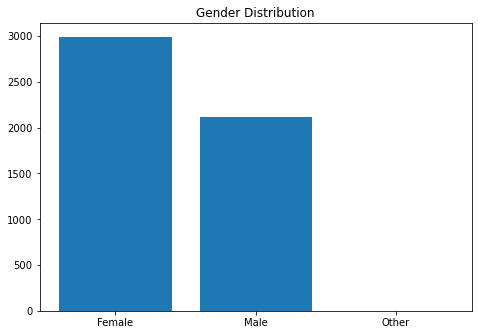

Percentage of Females:  0.5859099804305283
Percentage of Males:  0.41389432485322897
Percentage of Other:  0.00019569471624266145


In [11]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ["Female", "Male", "Other"]
x = data["gender"].value_counts()['Female']
y = data["gender"].value_counts()['Male']
z = data["gender"].value_counts()['Other']
counts = [x, y, z]
ax.bar(gender, counts)
plt.title("Gender Distribution")
plt.show()

print("Percentage of Females: ", x /(x+y+z))
print("Percentage of Males: ", y /(x+y+z))
print("Percentage of Other: ", z /(x+y+z))

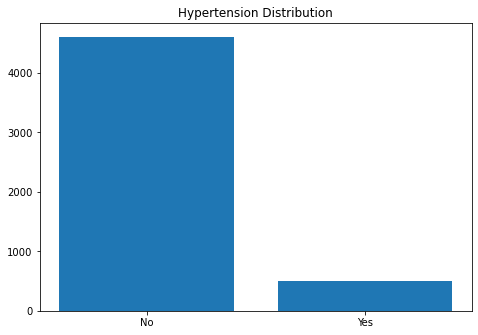

In [12]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
values = ["No", "Yes"]
x = data["hypertension"].value_counts()[0]
y = data["hypertension"].value_counts()[1]
counts = [x, y]
ax.bar(values, counts)
plt.title("Hypertension Distribution")
plt.show()

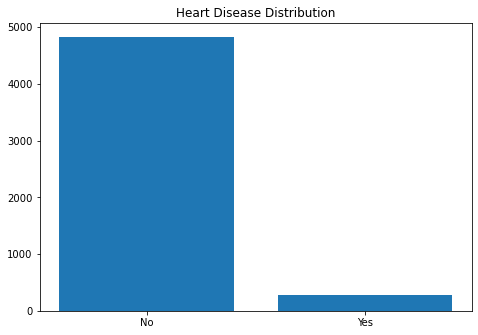

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
values = ["No", "Yes"]
x = data["heart_disease"].value_counts()[0]
y = data["heart_disease"].value_counts()[1]
counts = [x, y]
ax.bar(values, counts)
plt.title("Heart Disease Distribution")
plt.show()